In [7]:
import cv2
print(cv2.__version__)

3.4.18


# Exercise 1: Rigid and perspective transformations in homogeneous coordinates

In [23]:
import matplotlib.pyplot as plt
import numpy as np

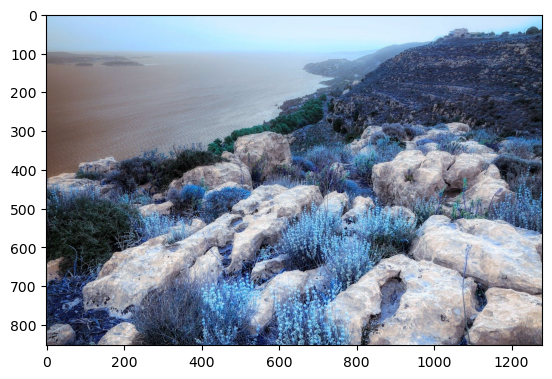

In [18]:
im = cv2.imread("crete.jpg")
plt.imshow(im)

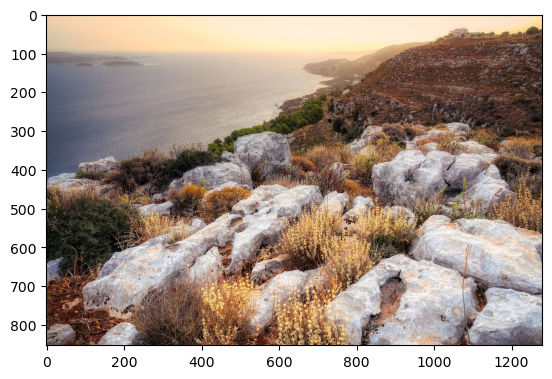

In [19]:
im = im[:,:,::-1]
plt.imshow(im)

In [24]:
import itertools as it
def box3d(n=16):
    points = []
    N = tuple(np.linspace(-1, 1, n))
    for i, j in [(-1, -1), (-1, 1), (1, 1), (0, 0)]:
        points.extend(set(it.permutations([(i, )*n, (j, )*n, N])))
    return np.hstack(points)/2

In [30]:
points = box3d(n=16)
points.shape

(3, 240)

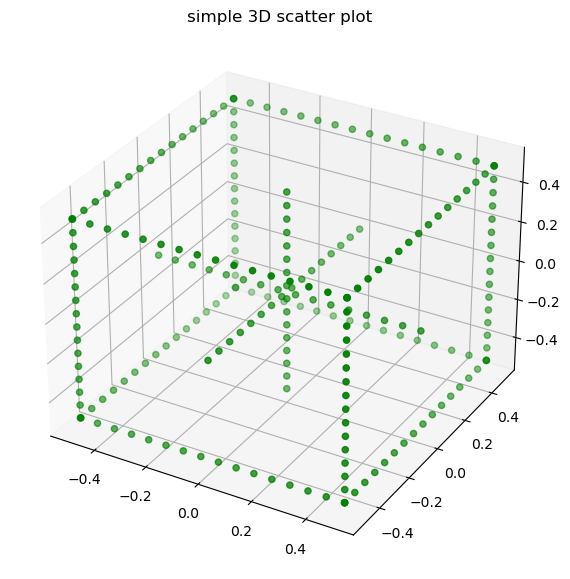

In [79]:
from mpl_toolkits import mplot3d
 
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(points[0,:], points[1,:], points[2,:], color = "green")
plt.title("simple 3D scatter plot")
 
# show plot
plt.show()

In [37]:
def Pi(points):
    n,p = points.shape
    new_points = np.vstack((points, np.ones(p)))
    return new_points

In [40]:
new_points = Pi(points)
new_points.shape

(4, 240)

In [41]:
new_points[:,0]

array([-0.5, -0.5, -0.5,  1. ])

In [42]:
def PiInv(points):
    n,p = points.shape
    new_points = points[:-1]/points[-1]
    return new_points

In [44]:
old_points = PiInv(new_points)
old_points.shape

(3, 240)

In [46]:
old_points[:,0]

array([-0.5, -0.5, -0.5])

In [67]:
def projectpoints(K,R,t,Q):
    homogeneous = Pi(Q)
    P = K @ ( np.hstack((R,t)) )
    q = P @ homogeneous
    q = PiInv(q)
    return q

In [100]:
K = np.identity(3)
R = K
t = np.array([[0], [0], [4]])
Q = points
q = projectpoints(K,R,t,Q)
q.shape

(2, 240)

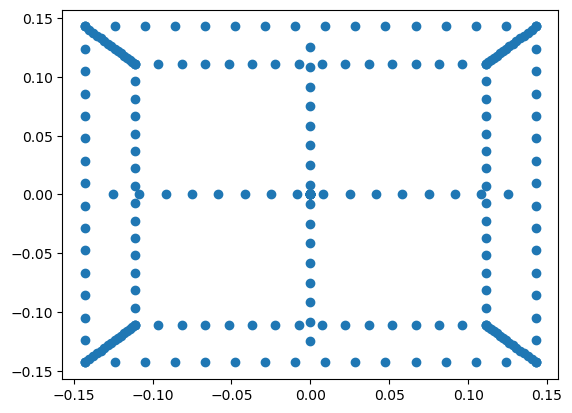

In [101]:
plt.scatter(q[0,:], q[1,:])
plt.show()

In [83]:
K = np.identity(3)
theta = 30*np.pi/180
R = np.array([[np.cos(theta), 0, np.sin(theta)],
              [0, 1, 0],
              [-np.sin(theta), 0, np.cos(theta)]])
t = np.array([[0], [0], [4]])
Q = points
q = projectpoints(K,R,t,Q)
q.shape

(2, 240)

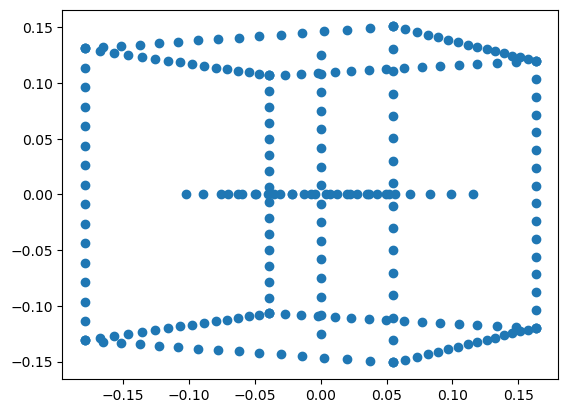

In [84]:
plt.scatter(q[0,:], q[1,:])
plt.show()